In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'MU'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2013-1-1')['Adj Close']

In [3]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

S = Current Stock Price

K = Strike Price

r = Risk-Free Interest Rate

stdev = Standard Deviation of Returns on the Stock

T = Time to Maturity in Years

In [4]:
def blackScholesModel(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [5]:
S = data.iloc[-1]
S

MU    42.77
Name: 2019-04-23 00:00:00, dtype: float64

In [6]:
log_returns = np.log(1 + data.pct_change())
log_returns.mean() * 251

MU    0.295033
dtype: float64

In [7]:
stdev = log_returns.std() * 251 ** .5
stdev

MU    0.441052
dtype: float64

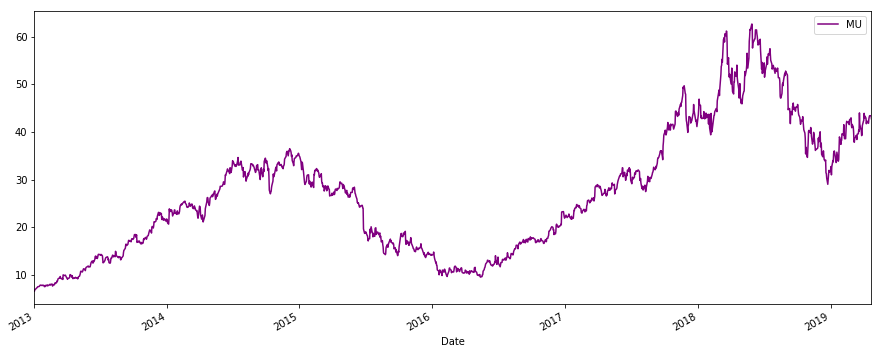

In [8]:
data.plot(figsize = (15,6), color = 'purple')
plt.show()

In [9]:
r = .025
K = 40
T = 1.0

In [10]:
d1(S, K, r, stdev, T)

MU    0.429022
dtype: float64

In [11]:
d2(S, K, r, stdev, T)

MU   -0.01203
dtype: float64

In [12]:
bsm = blackScholesModel(S, K, r, stdev, T)
print ('The call option price should be ' , bsm)

The call option price should be  MU    9.167831
Name: 2019-04-23 00:00:00, dtype: float64


SECOND METHOD STARTS HERE

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
stdev = stdev.values
stdev

array([0.44105188])

In [15]:
var = stdev ** 2
var

array([0.19452676])

In [16]:
type(stdev)

numpy.ndarray

In [17]:
t_intervals = 251
delta_t = T / t_intervals

iterations = 10000

In [18]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
X = np.zeros_like(Z) 
X0 = data.iloc[-1]  
X[0] = X0

In [19]:
for t in range(1, t_intervals + 1):
    X[t] = X[t-1] * np.exp((r - var / 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [20]:
X

array([[42.77000046, 42.77000046, 42.77000046, ..., 42.77000046,
        42.77000046, 42.77000046],
       [43.52030571, 43.95862167, 43.47989179, ..., 43.56626506,
        43.68459523, 43.97164496],
       [44.7417836 , 43.61441995, 44.1944492 , ..., 43.943079  ,
        44.18517315, 43.22740024],
       ...,
       [90.42511655, 26.76767301, 49.90057486, ..., 23.67223788,
        65.37270355, 30.71236069],
       [92.78083567, 26.13308735, 46.99879705, ..., 23.14678342,
        63.97060476, 32.10883574],
       [94.36260671, 25.78134733, 48.73623228, ..., 22.58908984,
        63.48554355, 30.52898478]])

In [21]:
X.shape

(252, 10000)

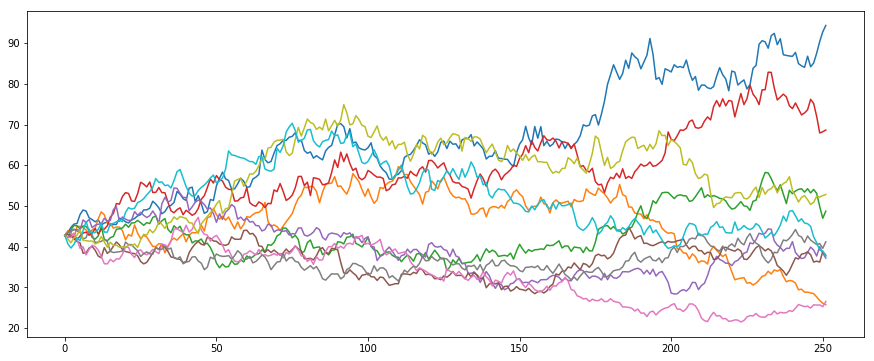

In [22]:
plt.figure(figsize = (15,6))
plt.plot(X[:, :10]);

In [23]:
p = np.maximum(X[-1] - 110, 0)

In [24]:
np.mean(p)

0.2098138278255391

In [25]:
p.shape

(10000,)

In [26]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.20463350595885427